# Geospatial mapping of the ESS Immigrant data

Install **geopandas, plotly and country_converter**. 


```Python
pip install geopandas #support for geographic data to pandas objects.
pip install plotly #enables to make publication-quality graphs
pip install country_converter--upgrade #country code converter 


In [1]:
#Load all the important packages
import geopandas as gpd 
import numpy as np
import pandas as pd
import country_converter as coco
import plotly.express as px

import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

from collections import OrderedDict
cmaps = OrderedDict()

You can download geospatial data from __[here](https://geojson-maps.ash.ms/)__. The page allows you to customize your own geospatial map with the regions you want. 

In [2]:
country = gpd.read_file("Desktop/Python/custom.geo.json")
country.head()

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry
0,1,Admin-0 country,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,...,Europe,Southern Europe,Europe & Central Asia,7,7,4,-99,1,ALB.geojson,"POLYGON ((20.59025 41.85540, 20.46318 41.51509..."
1,1,Admin-0 country,4,Austria,AUT,0,2,Sovereign country,Austria,AUT,...,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,AUT.geojson,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
2,1,Admin-0 country,2,Belgium,BEL,0,2,Sovereign country,Belgium,BEL,...,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,BEL.geojson,"POLYGON ((3.31497 51.34578, 4.04707 51.26726, ..."
3,1,Admin-0 country,4,Bulgaria,BGR,0,2,Sovereign country,Bulgaria,BGR,...,Europe,Eastern Europe,Europe & Central Asia,8,8,5,-99,1,BGR.geojson,"POLYGON ((22.65715 44.23492, 22.94483 43.82379..."
4,1,Admin-0 country,5,Bosnia and Herzegovina,BIH,0,2,Sovereign country,Bosnia and Herzegovina,BIH,...,Europe,Southern Europe,Europe & Central Asia,16,22,4,-99,1,BIH.geojson,"POLYGON ((19.00549 44.86023, 19.36803 44.86300..."


(30.0, 90.0)

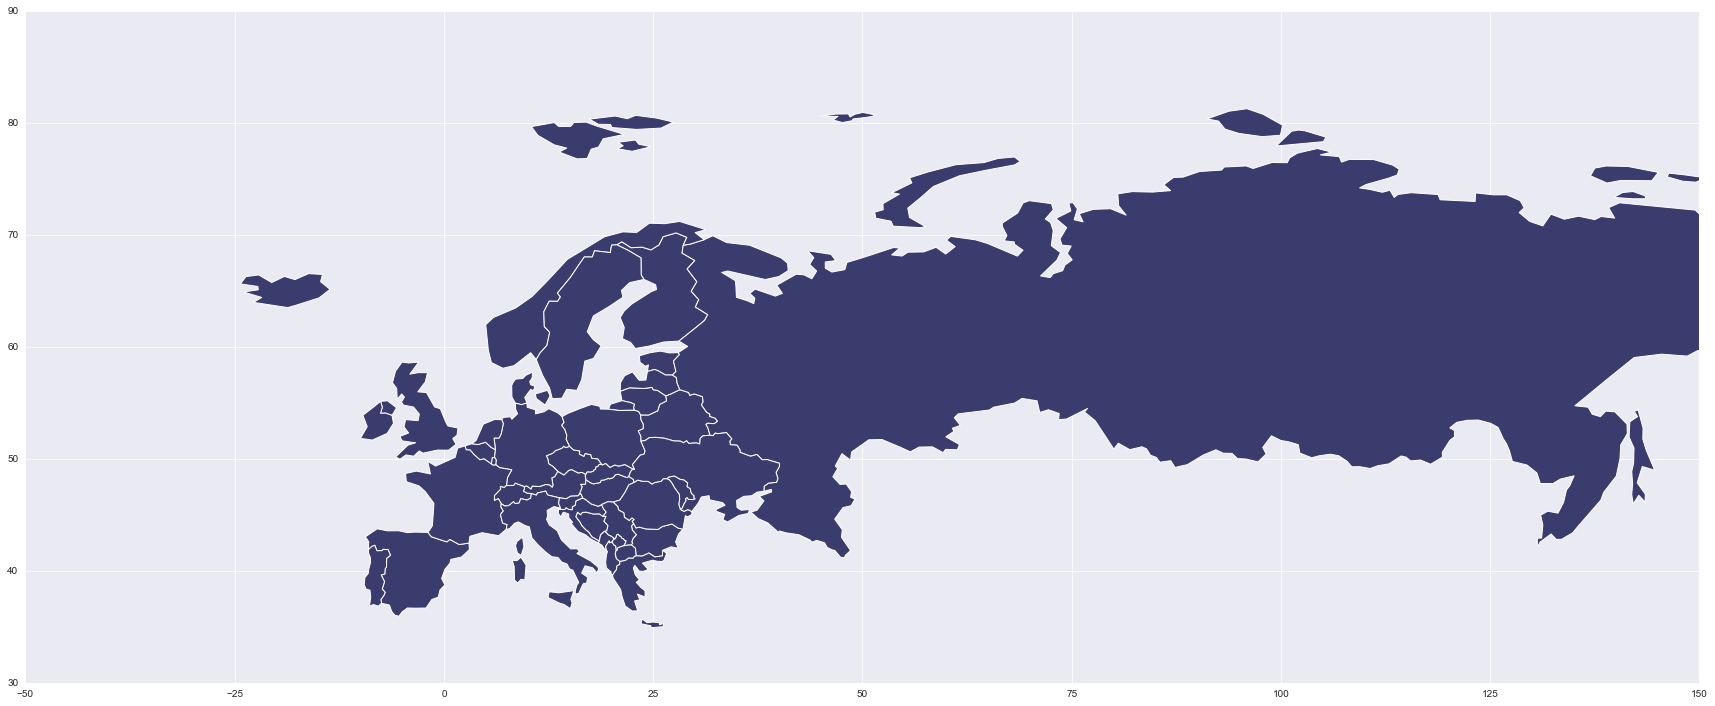

In [3]:
ax=country.plot(figsize=(30,20), color='#3B3C6E')
ax.set_xlim(-50,150)
ax.set_ylim(30,90)

### European Social Survey 
The European Social Survey (ESS) is an academically driven cross-national survey that has been conducted across Europe since its establishment in 2001. Every two years, face-to-face interviews are conducted with newly selected, cross-sectional samples.

The survey measures the attitudes, beliefs and behaviour patterns of diverse populations in more than thirty nations. 

In [3]:
data=pd.read_csv("Desktop/Python/ESS1-9e01_1 (1)/ESS1-9e01_1.csv", low_memory=False) 

**Imtcjob** is a variable that identifies the perception of the respondents in relation to whether immigrants take jobs away in country or create new jobs. The response could **range from 0-10**, with **0 being immigrants take jobs away from natives** and **10 immigrants create jobs**. 

In [4]:
data['imtcjob'].value_counts().sort_index()

0.0      5489
1.0      3554
2.0      5689
3.0      7651
4.0      7414
5.0     25562
6.0      7901
7.0      7678
8.0      5269
9.0      1459
10.0     1526
77.0       79
88.0     3191
99.0       82
Name: imtcjob, dtype: int64

The ESS uses ISO 2 country codes while the geojson data uses ISO 3 country codes. To be able to merge both databases we generate a new collumn for the ess data with the convertion of ISO2 to ISO3. 

In [5]:
#Creating a new collumn with adm0_a3 
data['adm0_a3']=coco.convert(names=data['cntry'] , to='ISO3')

We start by counting the number of individuals from each country that answer each of the imtcjob answers, storing that in a new dataset called **data_new**. Then we take the average of each row, which we will use to obtain the map plot later. 
Given that in **data_new** the countries are the index, we have to reset the index. 

In [30]:
#Average of the responses column: 
data_new = (data.groupby('adm0_a3')['imtcjob'].value_counts(normalize=True)*100).unstack()
data_new['mean'] = data_new.mean(axis=1)

In [31]:
#Merge country data with the dataset with the variables we want 
country_new= country.merge(data_new, on='adm0_a3')
country_new

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,5.0,6.0,7.0,8.0,9.0,10.0,77.0,88.0,99.0,mean
0,1,Admin-0 country,4,Austria,AUT,0,2,Sovereign country,Austria,AUT,...,34.180652,9.131293,8.218164,4.146101,1.456071,1.456071,NaN,5.947680,NaN,8.333333
1,1,Admin-0 country,2,Belgium,BEL,0,2,Sovereign country,Belgium,BEL,...,36.314068,8.969466,8.042530,3.707743,0.763359,0.817884,NaN,2.344602,0.136314,7.692308
2,1,Admin-0 country,4,Switzerland,CHE,0,2,Sovereign country,Switzerland,CHE,...,39.977604,9.882419,10.694289,7.502800,1.651736,1.063830,NaN,3.163494,NaN,8.333333
3,1,Admin-0 country,5,Czech Republic,CZE,0,2,Sovereign country,Czech Republic,CZE,...,22.805017,4.789054,3.677309,2.194983,0.598632,0.741163,NaN,4.789054,0.171038,7.692308
4,1,Admin-0 country,4,Denmark,DN1,1,2,Country,Denmark,DNK,...,37.533245,11.502660,14.195479,10.904255,2.360372,1.429521,NaN,3.856383,0.997340,7.692308
5,1,Admin-0 country,2,Germany,DEU,0,2,Sovereign country,Germany,DEU,...,36.217304,9.071093,9.859155,6.807512,1.961771,1.743796,0.134138,2.330651,NaN,7.692308
6,1,Admin-0 country,2,Spain,ESP,0,2,Sovereign country,Spain,ESP,...,28.981938,8.812261,9.578544,6.239737,2.517789,2.162014,0.684182,3.913519,0.054735,7.142857
7,1,Admin-0 country,6,Estonia,EST,0,2,Sovereign country,Estonia,EST,...,30.862994,13.115553,11.409069,8.093613,2.291565,3.364213,NaN,3.754266,NaN,8.333333
8,1,Admin-0 country,3,Finland,FI1,1,2,Country,Finland,FIN,...,32.321997,13.971128,13.310497,8.906288,2.251040,0.856374,0.048936,2.446782,0.024468,7.142857
9,1,Admin-0 country,2,France,FR1,1,2,Country,France,FRA,...,35.906433,9.736842,9.707602,7.719298,2.280702,2.602339,0.263158,1.842105,NaN,7.692308


Text(0.5, 1.0, 'Perception of European countries on wheter immigrants take jobs away or create jobs')

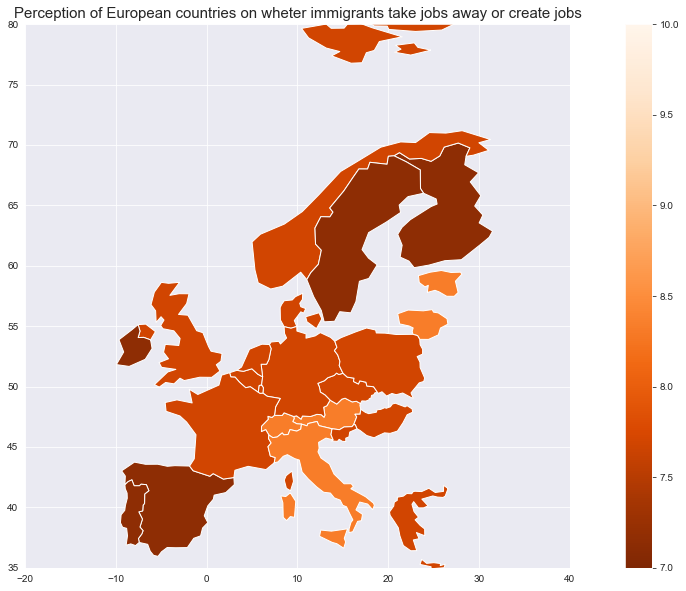

In [53]:
ax=country_new.plot(column='mean',figsize=(20,10),legend=True, cmap='Oranges_r', vmin=7, vmax=10)
ax.set_xlim(-20,40)
ax.set_ylim(35,80)
ax.set_title('Perception of European countries on wheter immigrants take jobs away or create jobs',fontsize= 15)

Text(0.5, 1.0, 'Number of respondents that answered that Immigrants take away jobs ')

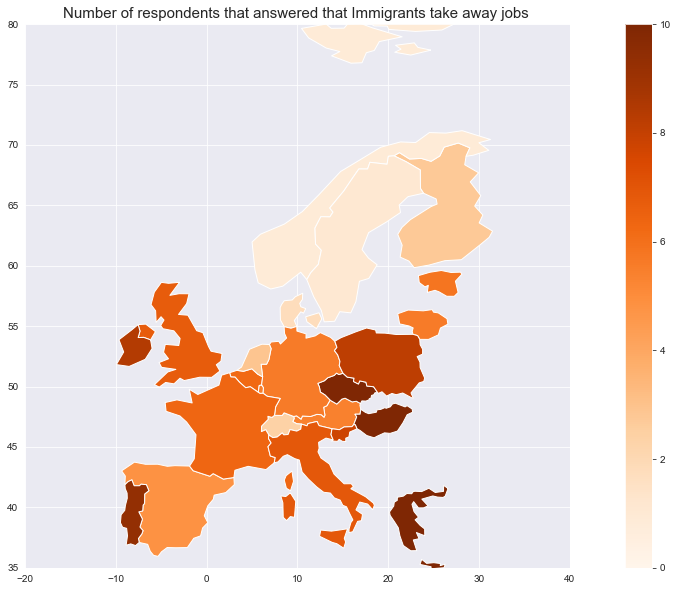

In [56]:
ax=country_new.plot(column=0.0,figsize=(20,10),legend=True, cmap='Oranges', vmin=0, vmax=10 )
ax.set_xlim(-20,40)
ax.set_ylim(35,80)
ax.set_title('Number of respondents that answered that Immigrants take away jobs ',fontsize= 15)


#### Conclusion

The countries that an average lower response in the question about wheter immigrants take away jobs or create are: 
- Portugal 
- Spain 
- Ireland 
- Sweden 
- Finland 

Which means that a higher percentage of respondents in those countries responded that immigrants take more jobs than create. 